# Testing clustering based on the MFPT

In [1]:
import sys
sys.path.append("../")
sys.path.append("../nmpath/")
from test.tools_for_notebook import *
%matplotlib inline
from nmpath.auxfunctions import *
from nmpath.mfpt import *
from nmpath.mappers import rectilinear_mapper
from nmpath.clustering import *
#from nmpath.mappers import voronoi_mapper

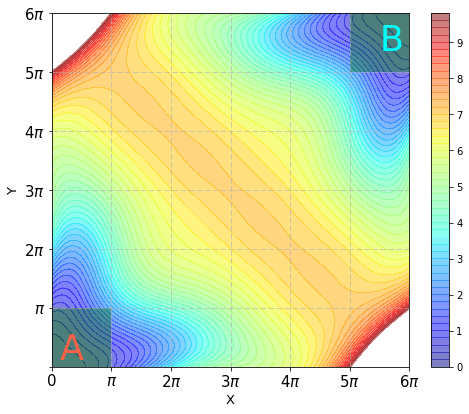

In [2]:
plot_traj([],[])

In [3]:
#Generating MC trajectory
mc_traj = mc_simulation2D(100000)
my_ensemble = Ensemble([mc_traj])

In [4]:
#print(my_ensemble)

In [5]:

d_ens = DiscreteEnsemble.from_ensemble(my_ensemble, mapping_function2D)

K = d_ens._mle_transition_matrix(N*N)

print(K)

print(d_ens)

[[  8.54798694e-01   4.37176834e-02   1.30928289e-02 ...,   1.12384787e-09
    1.12384787e-09   1.12384787e-09]
 [  6.43294059e-02   7.56407958e-01   3.48933289e-02 ...,   1.65371219e-09
    1.65371219e-09   1.65371219e-09]
 [  3.47553580e-02   6.29474700e-02   7.10620223e-01 ...,   2.98329227e-09
    2.98329227e-09   2.98329227e-09]
 ..., 
 [  2.17556769e-09   2.17556769e-09   2.17556769e-09 ...,   7.15109100e-01
    6.42880273e-02   3.27422958e-02]
 [  1.11632043e-09   1.11632043e-09   1.11632043e-09 ...,   3.29872698e-02
    7.72717001e-01   6.08394644e-02]
 [  7.88519071e-10   7.88519071e-10   7.88519071e-10 ...,   1.18672128e-02
    4.29742902e-02   8.59958900e-01]]

Discrete DiscreteEnsemble with 1 (1-dimensional) trajectories
Total number of snapshots: 100000


In [13]:
n_clusters = 75
clusters = kinetic_clustering_from_tmatrix(K, n_clusters)
print("\nClusters")
for i,cluster in enumerate(clusters):
    if len(cluster)>1: print(i, "\n",cluster)

Number of clusters:  143 142 141 140 139 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100 99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 

Clusters
0 
 [0, 1, 12, 13, 24, 2, 25, 14, 3, 36, 15, 37, 26, 48, 4, 49, 16, 27, 38, 61, 60, 50, 17, 5, 28, 62, 39, 51, 40, 72, 73, 29, 74]
40 
 [69, 70, 81, 82, 83, 93, 94, 95, 106, 107, 118, 119, 130, 131, 142, 143, 141, 129, 140, 128, 117, 139, 127, 116, 105, 115, 138, 126, 114, 125, 104, 137, 71, 113, 103, 92, 102, 80]


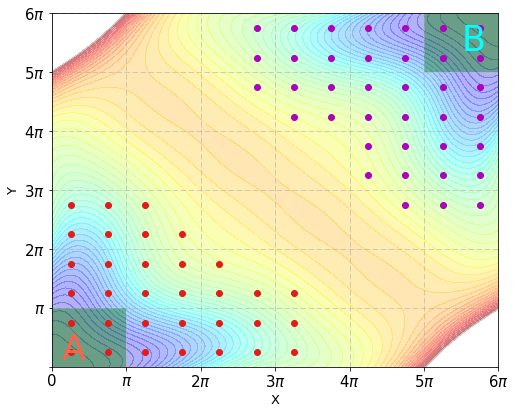

In [14]:
plot_traj([ [clusters[0],[]], [clusters[40],[]] ] ,discrete=[True, True], std = 0.00002, alpha=0.3, justpoints=True)